In [3]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# load data
sales = pd.read_csv("/Users/n/Downloads/DATA/Coffee Shop Sales/data/201904 sales reciepts.csv")
customers = pd.read_csv("/Users/n/Downloads/DATA/Coffee Shop Sales/data/customer.csv")
products = pd.read_csv("/Users/n/Downloads/DATA/Coffee Shop Sales/data/product.csv")
staff = pd.read_csv("/Users/n/Downloads/DATA/Coffee Shop Sales/data/staff.csv")
stores = pd.read_csv("/Users/n/Downloads/DATA/Coffee Shop Sales/data/sales_outlet.csv")
sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [5]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB
None


# 01 Data Cleaning

In [6]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'], errors='coerce')

sales['instore_yn'] = sales['instore_yn'].replace(['', ' '], np.nan)
sales['instore_yn'] = sales['instore_yn'].fillna(0)

# cat to boolean
sales['instore_yn'] = sales['instore_yn'].map({'Y': 1, 'N': 0})
sales['instore_yn'] = pd.to_numeric(sales['instore_yn'], errors='coerce')
sales['instore_yn'] = sales['instore_yn'].fillna(0).astype(int)
sales['promo_item_yn'] = sales['promo_item_yn'].map({'Y': 1, 'N': 0})

sales['order'] = pd.to_numeric(sales['order'], errors='coerce').astype('Int64')
sales['line_item_id'] = pd.to_numeric(sales['line_item_id'], errors='coerce').astype('Int64')
sales['quantity'] = pd.to_numeric(sales['quantity'], errors='coerce').astype('Int64')

sales['line_item_amount'] = pd.to_numeric(sales['line_item_amount'], errors='coerce')
sales['unit_price'] = pd.to_numeric(sales['unit_price'], errors='coerce')

sales = sales.drop_duplicates()
sales

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,0,1,1,52,1,2.50,2.50,0
1,11,2019-04-01,15:54:39,3,17,781,0,1,1,27,2,7.00,3.50,0
2,19,2019-04-01,14:34:59,3,17,788,1,1,1,46,2,5.00,2.50,0
3,32,2019-04-01,16:06:04,3,12,683,0,1,1,23,2,5.00,2.50,0
4,33,2019-04-01,19:18:37,3,17,99,1,1,1,34,1,2.45,2.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,0,1,1,30,1,3.00,3.00,0
49890,756,2019-04-29,16:51:14,8,42,8412,1,1,1,25,2,4.40,2.20,0
49891,759,2019-04-29,11:17:36,8,15,0,1,1,1,31,1,2.20,2.20,0
49892,763,2019-04-29,15:45:52,8,45,8030,0,1,1,44,2,5.00,2.50,0


In [7]:
# validate boolean
print(sales['instore_yn'].unique()[:10])
print(sales['promo_item_yn'].unique()[:10])

[0 1]
[0 1]


In [8]:
sales_merged = (
    sales
    .merge(products[['product_id', 'product']], on='product_id', how='left')
    .merge(products[['product_id', 'product_group']], on='product_id', how='left')
    .merge(products[['product_id', 'product_category']], on='product_id', how='left')
    .merge(products[['product_id', 'product_type']], on='product_id', how='left')
    .merge(stores[['sales_outlet_id', 'store_city']], on='sales_outlet_id', how='left')
    .merge(stores[['sales_outlet_id', 'sales_outlet_type']], on='sales_outlet_id', how='left')
    .merge(stores[['sales_outlet_id', 'store_square_feet']], on='sales_outlet_id', how='left')
    .merge(customers[['customer_id', 'customer_since']], on='customer_id', how='left')
    .merge(customers[['customer_id', 'gender']], on='customer_id', how='left')
)
sales_merged.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,promo_item_yn,product,product_group,product_category,product_type,store_city,sales_outlet_type,store_square_feet,customer_since,gender
0,7,2019-04-01,12:04:43,3,12,558,0,1,1,52,...,0,Traditional Blend Chai Rg,Beverages,Tea,Brewed Chai tea,Long Island City,retail,1300,2018-06-19,F
1,11,2019-04-01,15:54:39,3,17,781,0,1,1,27,...,0,Brazilian Lg,Beverages,Coffee,Organic brewed coffee,Long Island City,retail,1300,2018-11-02,N
2,19,2019-04-01,14:34:59,3,17,788,1,1,1,46,...,0,Serenity Green Tea Rg,Beverages,Tea,Brewed Green tea,Long Island City,retail,1300,2018-12-30,N
3,32,2019-04-01,16:06:04,3,12,683,0,1,1,23,...,0,Our Old Time Diner Blend Rg,Beverages,Coffee,Drip coffee,Long Island City,retail,1300,2019-03-04,F
4,33,2019-04-01,19:18:37,3,17,99,1,1,1,34,...,0,Jamaican Coffee River Sm,Beverages,Coffee,Premium brewed coffee,Long Island City,retail,1300,2017-10-01,M


# 02 Exploratory Data Analysis

In [9]:
print(sales_merged.info())
print(sales_merged.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     49894 non-null  int64         
 1   transaction_date   49894 non-null  datetime64[ns]
 2   transaction_time   49894 non-null  object        
 3   sales_outlet_id    49894 non-null  int64         
 4   staff_id           49894 non-null  int64         
 5   customer_id        49894 non-null  int64         
 6   instore_yn         49894 non-null  int64         
 7   order              49894 non-null  Int64         
 8   line_item_id       49894 non-null  Int64         
 9   product_id         49894 non-null  int64         
 10  quantity           49894 non-null  Int64         
 11  line_item_amount   49894 non-null  float64       
 12  unit_price         49894 non-null  float64       
 13  promo_item_yn      49894 non-null  int64         
 14  produc

In [10]:
print("Jumlah transaksi unik:", sales_merged['transaction_id'].nunique())
print("Jumlah customer unik:", sales_merged['customer_id'].nunique())
print("Jumlah produk unik:", sales_merged['product_id'].nunique())

Jumlah transaksi unik: 4203
Jumlah customer unik: 2248
Jumlah produk unik: 80


In [18]:
# Sales Analysis
total_sales = sales_merged['line_item_amount'].sum()
avg_sales_per_tx = sales_merged.groupby('transaction_id')['line_item_amount'].sum().mean()
print("Total sales:", total_sales)
print("Rata-rata sales per transaksi:", avg_sales_per_tx)

Total sales: 233635.94999999998
Rata-rata sales per transaksi: 55.58790149892934


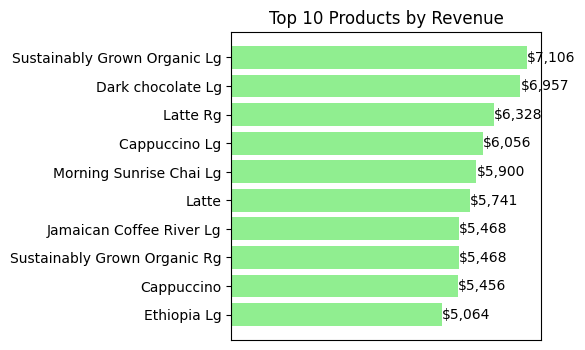

In [61]:
top_products_revenue = sales_merged.groupby('product')['line_item_amount'].sum().sort_values(ascending=False).head(10)

top_products_revenue = top_products_revenue.sort_values(ascending=True)

plt.figure(figsize=(4,4))
bars = plt.barh(top_products_revenue.index, top_products_revenue.values, color="lightgreen")

for i, (product, value) in enumerate(zip(top_products_revenue.index, top_products_revenue.values)):
    plt.text(value+0.3, i, f"${value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Top 10 Products by Revenue")
plt.xlabel("")
plt.xticks([])
plt.show()

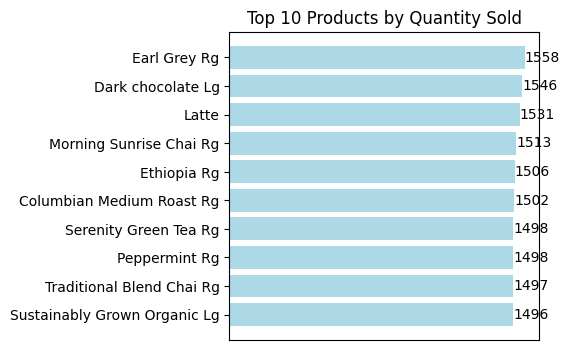

In [50]:
# Top Selling Products
top_products_qty = sales_merged.groupby('product')['quantity'].sum().sort_values(ascending=False).head(10)

top_products_qty_sorted = top_products_qty.sort_values(ascending=True)

plt.figure(figsize=(4,4))
bars = plt.barh(top_products_qty_sorted.index, top_products_qty_sorted.values, color="lightblue")

for i, (product, value) in enumerate(zip(top_products_qty_sorted.index, top_products_qty_sorted.values)):
    plt.text(value+0.2, i, str(value), va="center", ha="left", fontsize=10)

plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("")
plt.xticks([]) 
plt.show()

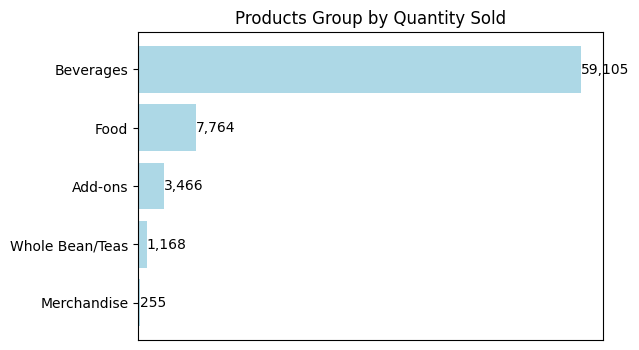

In [60]:
top_products_group_quantity = sales_merged.groupby('product_group')['quantity'].sum().sort_values(ascending=False).head(10)

top_products_group_quantity = top_products_group_quantity.sort_values(ascending=True)

plt.figure(figsize=(6,4))
bars = plt.barh(top_products_group_quantity.index, top_products_group_quantity.values, color="lightblue")

for i, (product_group, value) in enumerate(zip(top_products_group_quantity.index, top_products_group_quantity.values)):
    plt.text(value+0.5, i, f"{value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Products Group by Quantity Sold")
plt.xlabel("")
plt.xticks([])
plt.show()

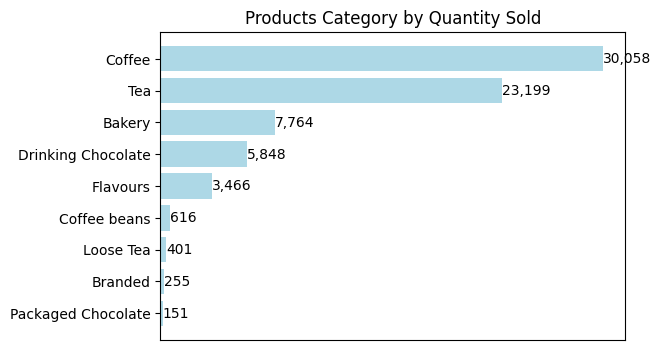

In [59]:
top_products_category_quantity = sales_merged.groupby('product_category')['quantity'].sum().sort_values(ascending=False).head(10)

top_products_category_quantity = top_products_category_quantity.sort_values(ascending=True)

plt.figure(figsize=(6,4))
bars = plt.barh(top_products_category_quantity.index, top_products_category_quantity.values, color="lightblue")

for i, (product_category, value) in enumerate(zip(top_products_category_quantity.index, top_products_category_quantity.values)):
    plt.text(value+0.5, i, f"{value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Products Category by Quantity Sold")
plt.xlabel("")
plt.xticks([])
plt.show()

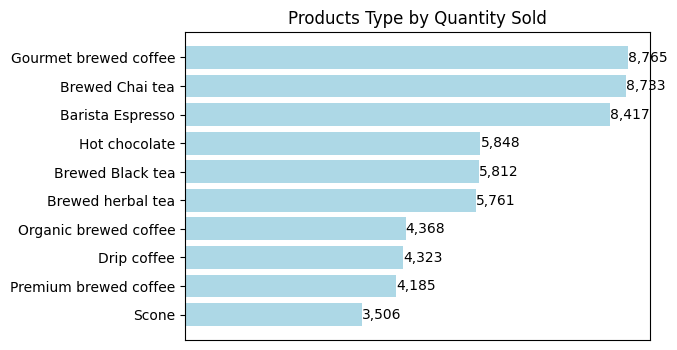

In [54]:
top_products_type_revenue = sales_merged.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(10)

top_products_type_revenue = top_products_type_revenue.sort_values(ascending=True)

plt.figure(figsize=(6,4))
bars = plt.barh(top_products_type_revenue.index, top_products_type_revenue.values, color="lightblue")

for i, (product_type, value) in enumerate(zip(top_products_type_revenue.index, top_products_type_revenue.values)):
    plt.text(value+0.5, i, f"{value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Products Type by Quantity Sold")
plt.xlabel("")
plt.xticks([])
plt.show()

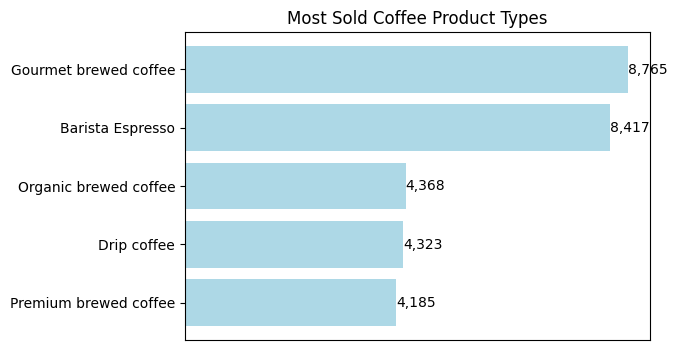

In [53]:
coffee_sales = sales_merged[sales_merged['product_category'] == 'Coffee']
coffe_quantity_sold = coffee_sales.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(10)

coffe_quantity_sold = coffe_quantity_sold.sort_values(ascending=True)

plt.figure(figsize=(6,4))
bars = plt.barh(coffe_quantity_sold.index, coffe_quantity_sold.values, color="lightblue")

for i, (product_type, value) in enumerate(zip(coffe_quantity_sold.index, coffe_quantity_sold.values)):
    plt.text(value+0.5, i, f"{value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Most Sold Coffee Product Types")
plt.xlabel("")
plt.xticks([])
plt.show()

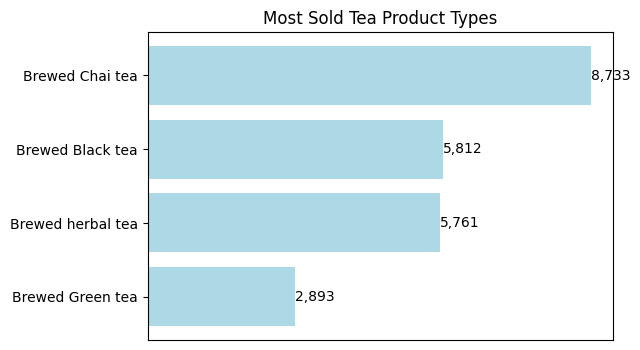

In [58]:
tea_sales = sales_merged[sales_merged['product_category'] == 'Tea']
tea_quantity_sold = tea_sales.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(10)

tea_quantity_sold = tea_quantity_sold.sort_values(ascending=True)

plt.figure(figsize=(6,4))
bars = plt.barh(tea_quantity_sold.index, tea_quantity_sold.values, color="lightblue")

for i, (product_type, value) in enumerate(zip(tea_quantity_sold.index, tea_quantity_sold.values)):
    plt.text(value+0.5, i, f"{value:,.0f}", va="center", ha="left", fontsize=10)

plt.title("Most Sold Tea Product Types")
plt.xlabel("")
plt.xticks([])
plt.show()

In [38]:
transaction_totals = sales_merged.groupby('transaction_id')['line_item_amount'].sum().reset_index()
transaction_totals = transaction_totals.merge(
    sales_merged[['transaction_id', 'sales_outlet_id']].drop_duplicates(),
    on='transaction_id'
)
avg_transaction_per_outlet = transaction_totals.groupby('sales_outlet_id')['line_item_amount'].mean()

sales_by_outlet = sales_merged.groupby('sales_outlet_id').agg(
    total_amount=('line_item_amount', 'sum'),
    total_check=('transaction_id', 'nunique'),
    store_city=('store_city', 'first'),
    sales_outlet_type=('sales_outlet_type', 'first'),
    store_square_feet=('store_square_feet', 'first')
).sort_values(by='total_amount', ascending=False)

sales_by_outlet.insert(2, 'avg_transaction', avg_transaction_per_outlet)

sales_by_outlet

,total_amount,total_check,avg_transaction,store_city,sales_outlet_type,store_square_feet
sales_outlet_id,,,,,,
8,79528.25,2859,79.291588,New York,retail,1500
3,77213.23,4203,55.587901,Long Island City,retail,1300
5,76894.47,2524,88.452872,New York,retail,900


In [86]:
# Total Check by Day Name
sales_merged['transaction_date'] = pd.to_datetime(sales_merged['transaction_date'])
sales_merged['day_of_week'] = sales_merged['transaction_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_merged['day_of_week'] = pd.Categorical(sales_merged['day_of_week'], categories=day_order, ordered=True)
sales_merged['month'] = sales_merged['transaction_date'].dt.month
sales_merged['hour'] = pd.to_datetime(sales_merged['transaction_time'], format='%H:%M:%S', errors='coerce').dt.hour

trx_by_day = sales_merged.groupby('day_of_week')['transaction_id'].count()
trx_by_day

/var/folders/y5/sprnqgnd5j75g9zqjb5z3z1h0000gn/T/ipykernel_3333/3457181456.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trx_by_day = sales_merged.groupby('day_of_week')['transaction_id'].count()


day_of_week
Monday       8471
Tuesday      6978
Wednesday    7105
Thursday     6831
Friday       6937
Saturday     6926
Sunday       6646
Name: transaction_id, dtype: int64

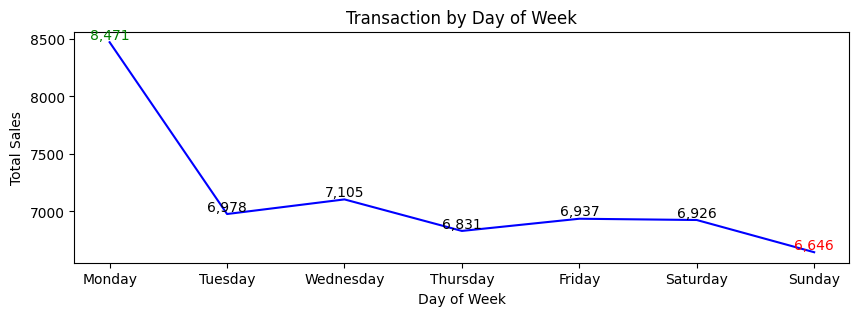

In [76]:
plt.figure(figsize=(10,3))
plt.plot(trx_by_day.index, trx_by_day.values, color='blue')
y_min = trx_by_day.min()
y_max = trx_by_day.max()
x_min = trx_by_day.idxmin()
x_max = trx_by_day.idxmax()
for x, y in zip(trx_by_day.index, trx_by_day.values):
    if y == y_min:
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='red')
    elif y == y_max:
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='green')
    else:
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='black')
        
plt.title('Transaction by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()


In [91]:
selected_day ='Monday'
selected_day_sales = sales_merged[sales_merged['day_of_week'] == selected_day]

selected_day_category_qty = selected_day_sales.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
selected_day_category_table = pd.DataFrame({
    'Quantity Sold': selected_day_category_qty.apply(lambda x: f"{x:,}"),  # ribuan dipisah koma
    'Percentage': (selected_day_category_qty / selected_day_category_qty.sum() * 100).round(1).astype(str) + '%'
})
print(f"Sales Distribution on {selected_day}: Coffee vs Tea\n")
selected_day_category_table

Sales Distribution on Monday: Coffee vs Tea



,Quantity Sold,Percentage
product_category,,
Coffee,"5,224",42.8%
Tea,"3,968",32.5%
Bakery,"1,346",11.0%
Drinking Chocolate,"1,017",8.3%
Flavours,442,3.6%
Coffee beans,95,0.8%
Loose Tea,64,0.5%
Branded,29,0.2%
Packaged Chocolate,22,0.2%


In [64]:
sales_by_hour = sales_merged.groupby('hour')['transaction_id'].count()
sales_by_hour

hour
1       22
2       30
3       25
4       18
5       17
6     1492
7     4468
8     5886
9     5906
10    6068
11    3283
12    2933
13    2937
14    3004
15    3009
16    3068
17    2950
18    2533
19    2047
20     198
Name: transaction_id, dtype: int64

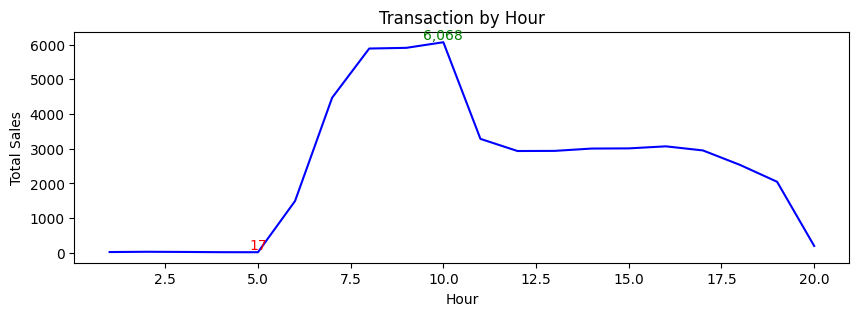

In [65]:
plt.figure(figsize=(10,3))
plt.plot(sales_by_hour.index, sales_by_hour.values, color='blue')
y_min = sales_by_hour.min()
y_max = sales_by_hour.max()
x_min = sales_by_hour.idxmin()
x_max = sales_by_hour.idxmax()
plt.text(x_min, y_min, f'{y_min:,.0f}', ha='center', va='bottom', color='red')
plt.text(x_max, y_max, f'{y_max:,.0f}', ha='center', va='bottom', color='green')

plt.title('Transaction by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()

In [66]:
# promo
promo_sales = sales_merged.groupby('promo_item_yn')['line_item_amount'].sum()

promo_sales

promo_item_yn
0    232147.05
1      1488.90
Name: line_item_amount, dtype: float64

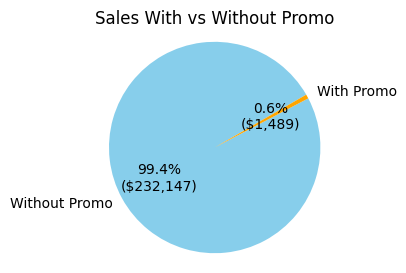

In [28]:
labels = ['Without Promo', 'With Promo']
sizes = promo_sales.values

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n(${absolute:,})"

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes),
        startangle=30, colors=['skyblue', 'orange'])
plt.title('Sales With vs Without Promo')
plt.axis('equal')
plt.show()